# Model parameter tuning

In this notebook I will explore the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 will look at regression and Part 2 will look at classification.

## Part 1 - Regression

First, I will generate the data and plot it

<IPython.core.display.Javascript object>


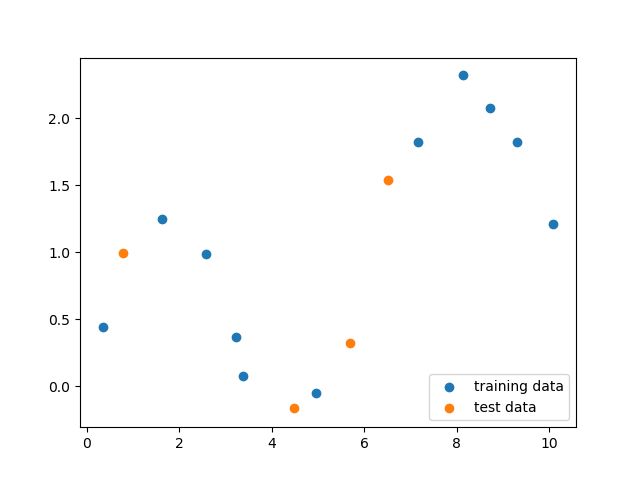

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

#this function creates visualization for the dataset by
# plotting a scatterplot of the data points
# in the training and test sets.
def part1_scatter():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4)
    plt.show()
    
part1_scatter()

### Polynomial regression

The function below fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1 (linear regression), 3, 6, and 9 (I used PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model). For each model, 100 predicted values were found over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and stored in a numpy array. The first row of this array corresponds to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.


In [87]:
def polyn_reg():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures

    degree=[1,3,6,9]
    x = np.linspace(0,10,100).reshape(100,1)
    prediction = np.zeros(shape=(4,100))
    i = 0
    for value in degree:
        poly = PolynomialFeatures(value)
        X_training = poly.fit_transform(X_train.reshape(len(X_train), 1))
        linreg = LinearRegression().fit(X_training, y_train)
        x_pred = poly.fit_transform(x)
        prediction[i] = linreg.predict(x_pred)
        i+=1
       
    return prediction

polyn_reg()

array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0

### Plotting the regressions

<IPython.core.display.Javascript object>


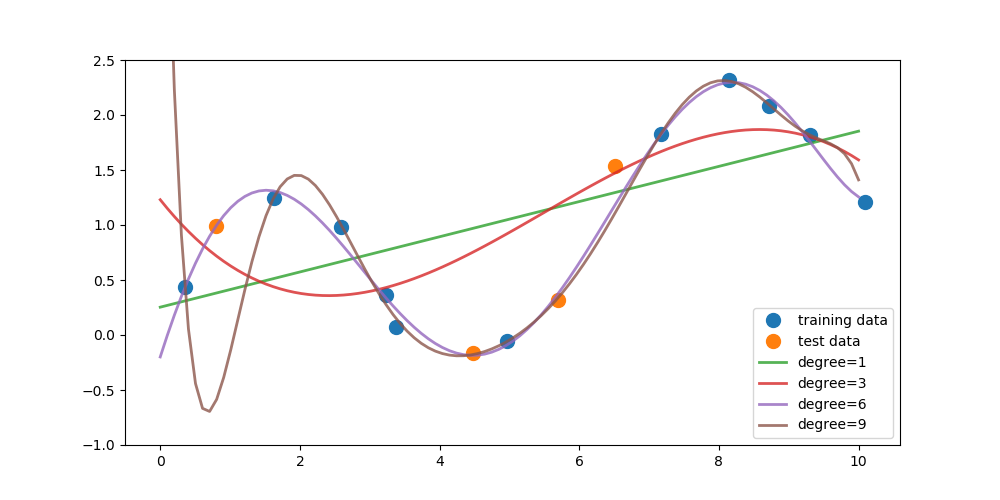

In [88]:
def plot_reg(degree_predictions):
    import matplotlib.pyplot as plt
    %matplotlib notebook
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)
    plt.show()

plot_reg(polyn_reg())

We can see in the visual that Degree 6 fit the data better than the others. Let's evaluate the models to confirm


### Coefficient of determination

Below function fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model I compute the $R^2$ (coefficient of determination) regression score on the training data as well as the test data, and return both of these arrays in a tuple.

In [89]:
def coeff_r2():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score

    # Your code here
    r2_train = np.zeros(shape=(10))
    r2_test = np.zeros(shape=(10))
    for value in range(10):
        poly = PolynomialFeatures(value)
        X_training = poly.fit_transform(X_train.reshape(len(X_train), 1))
        X_testing = poly.fit_transform(X_test.reshape(len(X_test), 1))
        linreg = LinearRegression().fit(X_training, y_train)
        r2_train[value] = linreg.score(X_training, y_train)
        r2_test[value] = linreg.score(X_testing, y_test)

    return (r2_train, r2_test)# Your answer here

coeff_r2()

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
        0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]),
 array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
         0.87708301,  0.9214094 ,  0.92021504,  0.6324795 , -0.64524777]))

### Plotting the R2 by the degree

<IPython.core.display.Javascript object>


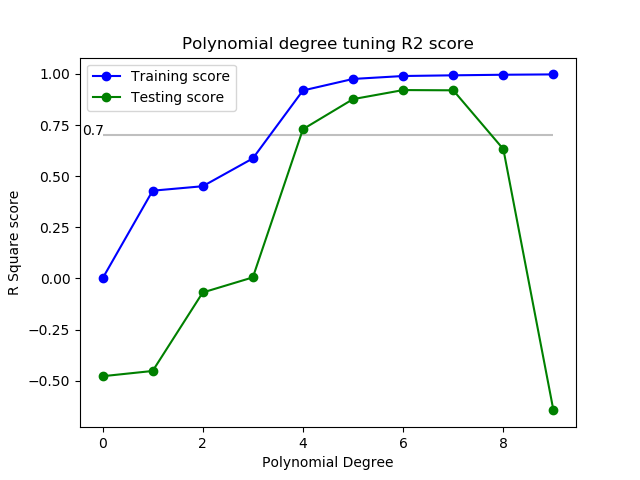

In [90]:
def score_rplot():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    r2_train, r2_test = coeff_r2()
    x_axis = range(10)
    plt.figure()
    plt.plot(x_axis, r2_train, color = "blue", marker = "o", label = "Training score")
    plt.plot(x_axis, r2_test, color = "green", marker = "o", label = "Testing score")
    plt.legend()
    plt.xlabel("Polynomial Degree")
    plt.ylabel("R Square score")
    plt.hlines(0.7, 0, 9, linestyle='-', color='gray', alpha = 0.5)
    plt.text(-0.4, 0.7, str(0.7))
    plt.title("Polynomial degree tuning R2 score")
    plt.show()

score_rplot()

Based on the $R^2$ scores above (degree levels 0 through 9), and considering at least 70% score, we can see that models with degree less than 4 underfit the data, while degrees greater than 7 overfit the data.

Degrees between 4 and 7 fit the data well, however the best models are the model with degree 6 and 7.

Conclusion: Degree 6 is the best performing model as it fits the data very well and less complex than the one with degree 7

## Part 2 - Classification

For this section I will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

The data in the mushrooms dataset is currently encoded with strings. I will encode these values to numeric to work with sklearn. I wll use pd.get_dummies to convert the categorical variables into indicator variables. 

In [91]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split

mush_file = os.path.join("Resources", "mushrooms.csv")
mush_df = pd.read_csv(mush_file)
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state=0)

# For performance reasons , I will create a smaller version of the
# entire mushroom dataset for use later.  For simplicity I wll just re-use
# the 25% test split created above as the representative subset.
#
X_subset = X_test2
y_subset = y_test2

### Feature importance

Using `X_train2` and `y_train2` from the preceeding cell, I will train a DecisionTreeClassifier with default parameters and random_state=0. I will identify the 5 most important features found by the decision tree

*The below function will return a list of length 5 containing the feature names in descending order of importance.*


In [92]:
def five_important():
    from sklearn.tree import DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=0).fit(X_train2, y_train2)
    features = clf.feature_importances_
    df = pd.DataFrame(features, X_train2.columns, columns=['FeatureImportance'])
    important = df.nlargest(5,'FeatureImportance')
    return important.index.values.tolist()

five_important()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### SVC Parameter tuning

For this question, I am going to use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for a Support Vector Classifier (`SVC`) with varying parameter values.  The validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

**Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: I will use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.**

The initialized unfitted classifier object I will be using is a Support Vector Classifier with radial basis kernel.  So the first step is to create an `SVC` object with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. The kernel width of the RBF kernel is controlled using the `gamma` parameter.  

With this classifier, and the dataset in X_subset, y_subset, I will explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `0.0001` to `10` (i.e. `np.logspace(-4,1,6)`). In this case, I will be using "accuracy" as the scoring metric.

For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

I will find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.


In [93]:
def mushsvc_scores():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve

    gamma = np.logspace(-4,1,6)
    train_scores, test_scores = validation_curve(SVC(), X_subset, y_subset ,param_name='gamma',param_range=gamma, cv=3)
    training_scores = train_scores.mean(axis=1)
    test_scores = test_scores.mean(axis=1)
    
    return (training_scores, test_scores)

mush_scores = mushsvc_scores()
mush_scores

(array([0.56647847, 0.93155951, 0.99039881, 1.        , 1.        ,
        1.        ]),
 array([0.56768547, 0.92959558, 0.98965952, 1.        , 0.99507994,
        0.52240279]))

### Plotting the accuracy for the values of gamma

<IPython.core.display.Javascript object>


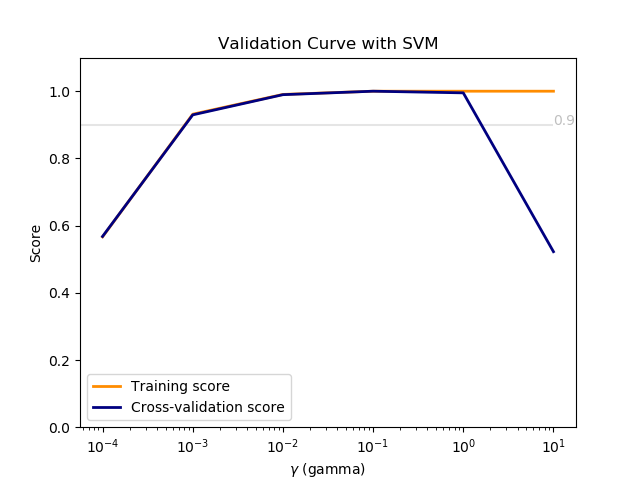

In [94]:
def score_aucplot():
    import matplotlib.pyplot as plt
    %matplotlib notebook
    training_scores, test_scores = mush_scores
    plt.figure()
    plt.title('Validation Curve with SVM')
    plt.xlabel('$\gamma$ (gamma)')
    plt.ylabel('Score')
    plt.ylim(0.0, 1.1)
    lw = 2
    gamma = np.logspace(-4,1,6)
    plt.semilogx(gamma, training_scores, label='Training score',color='darkorange', lw=lw)
    plt.semilogx(gamma, test_scores, label='Cross-validation score',color='navy', lw=lw)
    plt.legend(loc='best')
    plt.hlines(0.9, 0, 10, linestyle='-', color='gray', alpha = 0.2)
    plt.text(10, 0.9, str(0.9), color = "gray", alpha = 0.5)
    plt.show()

score_aucplot()

Based on the  accuracy  scores above (`gamma` from `0.0001` to `10`), and considering at least 90% score, we can see that models with gamma less than 0.001 underfit the data, while gamma greater than 1 overfit the data.

gamma values between 0.001 and 1 fit the data well, however the best model is the model with `gamma = 0.1`.